<a href="https://colab.research.google.com/github/Gus-1003/ENEM_2021-Data_analysis/blob/main/An%C3%A1lise_Geral_Microdados_Enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto da Pesquisa:

## Objetivo:

Analisar o padrão de resposta dos candidatos do ENEM 2021 e divulgar, de acordo com os fundamentos da Ciências dos Dados, métricas utilizadas pela Teoria de Resposta Item para cada questão do exame relacionando com dados populacionais.

## Metodologia:

Processamento do banco de dados que contêm as respostas dos alunos para cada questão com ferramentas de Extração-Transformação-Carga (ETL, em inglês). Utilização de estatística descritiva para descrever as características de cada questão e da população em estudo. Utilização de estatística inferencial por métodos não-supervisionados (análise de cluster e PCA) para indicar casos de correspondência e correlação entre índice de acerto das questões e as variáveis populacionais.

## Metadados:

***DADOS DO PARTICIPANTE:***

*   NU_INSCRICAO 
    * Número de inscrição
*   NU_ANO
    * Ano do Enem
*   TP_FAIXA_ETARIA
*   TP_SEXO
*   TP_ESTADO_CIVIL
*   TP_COR_RACA 
*   TP_NACIONALIDADE  
*   TP_ST_CONCLUSAO
    * Situação de conclusão do Ensino Médio
*   TP_ANO_CONCLUIU
    * Ano de Conclusão do Ensino Médio
*   TP_ESCOLA
    * Tipo de escola do Ensino Médio               
*   TP_ENSINO
    * Tipo de instituição que concluiu ou concluirá o Ensino Médio 
*   IN_TREINEIRO
    * Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos

---
***DADOS DA ESCOLA:***
          
*   CO_MUNICIPIO_ESC
    * Código do município da escola         
*   NO_MUNICIPIO_ESC  
    * Nome do município da escola        
*   CO_UF_ESC
    * Código da Unidade da Federação da escola                
*   SG_UF_ESC
    * Sigla da Unidade da Federação da escola                
*   TP_DEPENDENCIA_ADM_ESC
    * Dependência administrativa (Escola)   
*   TP_LOCALIZACAO_ESC
    * Localização (Escola)        
*   TP_SIT_FUNC_ESC
    * Situação de funcionamento (Escola) 

---
***DADOS DO LOCAL DE APLICAÇÃO DA PROVA***					

*   CO_MUNICIPIO_PROVA
    * Código do município da aplicação da prova   
*   NO_MUNICIPIO_PROVA
    * Nome do município da aplicação da prova    
*   CO_UF_PROVA
    * Código da Unidade da Federação da aplicação da prova          
*   SG_UF_PROVA
    * Sigla da Unidade da Federação da aplicação da prova


---
***DADOS DA PROVA OBJETIVA***

*   CN - Ciências da Natureza
*   CH - Ciências Humanas
*   LC - Linguagens e Códigos
*   MT - Objetiva de Matemática

**Presença na prova objetiva:**
*   TP_PRESENCA_CN          
*   TP_PRESENCA_CH       
*   TP_PRESENCA_LC         
*   TP_PRESENCA_MT

**Código do tipo de prova:**
*   CO_PROVA_CN       
*   CO_PROVA_CH           
*   CO_PROVA_LC          
*   CO_PROVA_MT

**Nota da prova:**
*   NU_NOTA_CN            
*   NU_NOTA_CH              
*   NU_NOTA_LC             
*   NU_NOTA_MT 

**Vetor com as respostas da parte objetiva da prova:**
*   TX_RESPOSTAS_CN         
*   TX_RESPOSTAS_CH      
*   TX_RESPOSTAS_LC         
*   TX_RESPOSTAS_MT

**Língua Estrangeira:** 
*   TP_LINGUA  (0 - Inglês / 1 - Espanhol)

**Vetor com o gabarito da parte objetiva da prova:** 
*   TX_GABARITO_CN          
*   TX_GABARITO_CH         
*   TX_GABARITO_LC         
*   TX_GABARITO_MT


---
***DADOS DA REDAÇÃO***

**Situação da redação do participante:**
*   TP_STATUS_REDACAO   

**Nota da competência:**
*   NU_NOTA_COMP1          
*   NU_NOTA_COMP2         
*   NU_NOTA_COMP3           
*   NU_NOTA_COMP4         
*   NU_NOTA_COMP5 

**Nota da prova de redação:**
*   NU_NOTA_REDACAO


---
***DADOS DO QUESTIONÁRIO SOCIOECONÔMICO***

*   1 ... 25 Questões


# Análise Geral_Microdados_Enem

## Import de libs e ferramentas:

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


## 1.Análise Exploratoria

In [3]:
# ler dados de interesse
dados = pd.read_csv('/content/drive/MyDrive/PIBIC-ENEM2021-Gustavo_Maciel/Base de Dados/MICRODADOS_ENEM_2021.csv', encoding='latin-1', delimiter=";", quotechar='"')

In [4]:
display(dados)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389827,210053249138,2021,7,F,1,3,1,1,0,1,...,A,A,A,B,A,A,B,A,A,B
3389828,210053776013,2021,7,F,1,1,1,1,5,1,...,B,A,B,C,A,A,E,B,B,B
3389829,210052441508,2021,13,F,1,3,1,1,15,1,...,B,A,A,A,A,A,B,A,B,B
3389830,210051139675,2021,7,F,1,1,1,1,4,1,...,B,A,B,B,A,B,E,A,C,B


In [5]:
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [7]:
dados.describe()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,3.389832e+06,3389832.0,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,1.096828e+06,...,2.245844e+06,3.389832e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,2.378379e+06,3.389830e+06
mean,2.100527e+11,2021.0,5.306013e+00,1.052073e+00,2.043491e+00,1.027106e+00,1.608430e+00,2.581980e+00,1.396214e+00,1.006295e+00,...,5.350802e+02,4.704640e-01,1.140684e+00,1.192657e+02,1.380269e+02,1.153117e+02,1.281853e+02,1.127109e+02,6.135005e+02,3.739557e+00
std,9.962403e+05,0.0,3.902871e+00,4.129414e-01,1.022561e+00,2.049293e-01,7.198306e-01,4.278731e+00,5.938455e-01,7.909361e-02,...,1.106267e+02,4.991269e-01,7.910804e-01,3.391962e+01,4.563224e+01,3.634138e+01,3.883252e+01,6.005667e+01,1.907142e+02,1.378942e+00
min,2.100510e+11,2021.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.100519e+11,2021.0,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,4.447000e+02,0.000000e+00,1.000000e+00,1.000000e+02,1.200000e+02,1.000000e+02,1.200000e+02,8.000000e+01,5.200000e+02,3.000000e+00
50%,2.100527e+11,2021.0,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,5.154000e+02,0.000000e+00,1.000000e+00,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,6.000000e+02,4.000000e+00
75%,2.100536e+11,2021.0,7.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,...,6.139000e+02,1.000000e+00,1.000000e+00,1.400000e+02,1.800000e+02,1.400000e+02,1.600000e+02,1.600000e+02,7.400000e+02,4.000000e+00
max,2.100545e+11,2021.0,2.000000e+01,4.000000e+00,6.000000e+00,4.000000e+00,4.000000e+00,1.500000e+01,3.000000e+00,2.000000e+00,...,9.531000e+02,1.000000e+00,9.000000e+00,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03,2.000000e+01


In [8]:
dados.describe(include='object')

,TP_SEXO,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
count,3389832,813806,813806,3389832,3389832,2245844,2378379,2378379,2245844,2245844,...,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830,3389830
unique,2,5271,27,1712,27,2244621,2371495,2375813,2244141,8,...,5,5,2,5,2,2,5,2,5,2
top,F,São Paulo,SP,São Paulo,SP,.............................................,.............................................,.....99999.......................................,.............................................,ADCDCDBBBECDCCDCBCBDABCAADCBEBABEEBBBCABEDEDE,...,B,A,A,B,A,A,D,A,A,B
freq,2090526,37692,139473,141840,509954,393,4632,1297,453,550219,...,1698583,3282971,2579763,2217847,2733449,2642067,1002077,2865104,1436524,3037632


In [9]:
dados.shape

(3389832, 76)

In [10]:
# Desejo meu: usar a função isna de um jeito que ela mostre as colunas que tem mais que x valor de NAN
dados.isna().sum()

NU_INSCRICAO       0
NU_ANO             0
TP_FAIXA_ETARIA    0
TP_SEXO            0
TP_ESTADO_CIVIL    0
                  ..
Q021               2
Q022               2
Q023               2
Q024               2
Q025               2
Length: 76, dtype: int64

### Separação dos grupos de caracteristicas:

In [11]:
infoCandidado = dados.iloc[:,0:12]
infoEscola = dados.iloc[:,12:19]
infoExame = dados.iloc[:,19:23]
infoProvaObjetiva = dados.iloc[:,23:44]
infoRedação = dados.iloc[:,44:51]
infoQuest = dados.iloc[:,51:76]

### Trabalando com os dados dos candidatos:

In [12]:
display(infoCandidado)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO
0,210053865474,2021,5,F,1,1,1,1,3,1,NaN,0
1,210052384164,2021,12,M,1,1,1,1,11,1,NaN,0
2,210052589243,2021,13,F,3,1,1,1,15,1,NaN,0
3,210052128335,2021,3,M,1,3,1,2,0,2,1.0,0
4,210051353021,2021,2,F,1,3,1,2,0,2,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3389827,210053249138,2021,7,F,1,3,1,1,0,1,NaN,0
3389828,210053776013,2021,7,F,1,1,1,1,5,1,NaN,0
3389829,210052441508,2021,13,F,1,3,1,1,15,1,NaN,0
3389830,210051139675,2021,7,F,1,1,1,1,4,1,NaN,0


In [13]:
infoCandidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   NU_INSCRICAO      int64  
 1   NU_ANO            int64  
 2   TP_FAIXA_ETARIA   int64  
 3   TP_SEXO           object 
 4   TP_ESTADO_CIVIL   int64  
 5   TP_COR_RACA       int64  
 6   TP_NACIONALIDADE  int64  
 7   TP_ST_CONCLUSAO   int64  
 8   TP_ANO_CONCLUIU   int64  
 9   TP_ESCOLA         int64  
 10  TP_ENSINO         float64
 11  IN_TREINEIRO      int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 310.3+ MB


In [14]:
infoCandidado.describe()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO
count,3.389832e+06,3389832.0,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,3.389832e+06,1.096828e+06,3.389832e+06
mean,2.100527e+11,2021.0,5.306013e+00,1.052073e+00,2.043491e+00,1.027106e+00,1.608430e+00,2.581980e+00,1.396214e+00,1.006295e+00,1.289710e-01
std,9.962403e+05,0.0,3.902871e+00,4.129414e-01,1.022561e+00,2.049293e-01,7.198306e-01,4.278731e+00,5.938455e-01,7.909361e-02,3.351679e-01
min,2.100510e+11,2021.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2.100519e+11,2021.0,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2.100527e+11,2021.0,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,2.100536e+11,2021.0,7.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00
max,2.100545e+11,2021.0,2.000000e+01,4.000000e+00,6.000000e+00,4.000000e+00,4.000000e+00,1.500000e+01,3.000000e+00,2.000000e+00,1.000000e+00


In [15]:
infoCandidado.isna().sum()

NU_INSCRICAO              0
NU_ANO                    0
TP_FAIXA_ETARIA           0
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_NACIONALIDADE          0
TP_ST_CONCLUSAO           0
TP_ANO_CONCLUIU           0
TP_ESCOLA                 0
TP_ENSINO           2293004
IN_TREINEIRO              0
dtype: int64

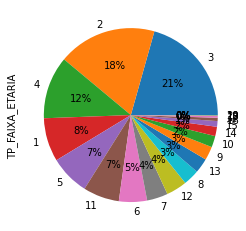

In [16]:
infoCandidado['TP_FAIXA_ETARIA'].value_counts().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* 1	- Menor de 17 anos
* 2	- 17 anos
* 3	- 18 anos
* 4	- 19 anos
* 5	- 20 anos
* 6 - 21 anos
* 7	- 22 anos
* 8	- 23 anos
* 9	- 24 anos
* 10 - 25 anos
* 11 - Entre 26 e 30 anos
* 12 - Entre 31 e 35 anos
* 13 - Entre 36 e 40 anos
* 14 - Entre 41 e 45 anos
* 15 - Entre 46 e 50 anos
* 16 - Entre 51 e 55 anos
* 17 - Entre 56 e 60 anos
* 18 - Entre 61 e 65 anos
* 19 - Entre 66 e 70 anos
* 20 - Maior de 70 anos

In [17]:
infoCandidado['TP_FAIXA_ETARIA'].value_counts()

3     699365
2     620784
4     394689
1     274318
5     250690
11    227574
6     177086
7     132052
12    130746
8     100580
13     93073
9      85742
10     71199
14     58754
15     35808
16     20564
17     10804
18      4102
19      1342
20       560
Name: TP_FAIXA_ETARIA, dtype: int64

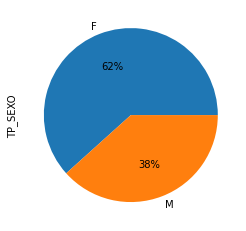

In [18]:
infoCandidado['TP_SEXO'].value_counts().head().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* M - Masculino
* F - Feminino 

In [19]:
infoCandidado['TP_SEXO'].value_counts()

F    2090526
M    1299306
Name: TP_SEXO, dtype: int64

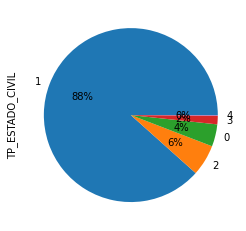

In [20]:
infoCandidado['TP_ESTADO_CIVIL'].value_counts().head().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* 0	- Não informado
* 1	- Solteiro(a)
* 2	- Casado(a)/Mora com companheiro(a)
* 3	- Divorciado(a)/Desquitado(a)/Separado(a)
* 4	- Viúvo(a)

In [21]:
infoCandidado['TP_ESTADO_CIVIL'].value_counts()

1    2995915
2     196285
0     139630
3      54141
4       3861
Name: TP_ESTADO_CIVIL, dtype: int64

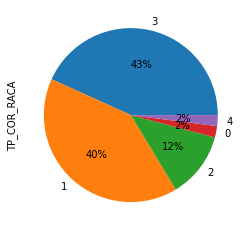

In [22]:
infoCandidado['TP_COR_RACA'].value_counts().head().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* 0 - Não declarado
* 1 - Branca
* 2 - Preta
* 3 - Parda
* 4 - Amarela
* 5 - Indígena 
* 6 - Não dispõe da informação

In [23]:
infoCandidado['TP_COR_RACA'].value_counts()

3    1457454
1    1362256
2     411302
0      71149
4      68491
5      19175
6          5
Name: TP_COR_RACA, dtype: int64

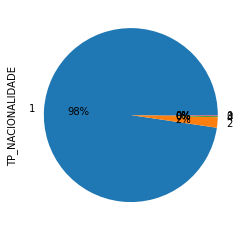

In [24]:
infoCandidado['TP_NACIONALIDADE'].value_counts().head().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* 0 - Não informado
* 1 - Brasileiro(a)
* 2 - Brasileiro(a) Naturalizado(a)
* 3 - Estrangeiro(a)
* 4 - Brasileiro(a) Nato(a), nascido(a) no exterior

In [25]:
infoCandidado['TP_NACIONALIDADE'].value_counts()

1    3310876
2      65525
4       6526
3       4562
0       2343
Name: TP_NACIONALIDADE, dtype: int64

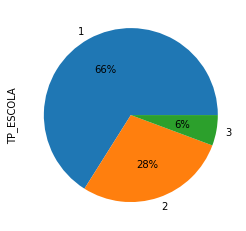

In [26]:
infoCandidado['TP_ESCOLA'].value_counts().head().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* 1 - Não Respondeu
* 2 - Pública
* 3 - Privada

In [27]:
infoCandidado['TP_ESCOLA'].value_counts()

1    2238977
2     958611
3     192244
Name: TP_ESCOLA, dtype: int64

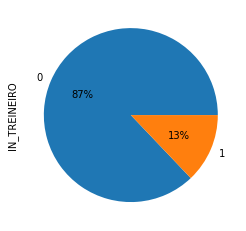

In [28]:
infoCandidado['IN_TREINEIRO'].value_counts().head().plot.pie(autopct='%.0f%%')

***Significado das porcentagens:***

* 0 - Não é treineiro
* 1 - É treineiro

In [29]:
infoCandidado['IN_TREINEIRO'].value_counts()

0    2952642
1     437190
Name: IN_TREINEIRO, dtype: int64